# DigitRecognizer

## 1 导入包

In [1]:
# basic
import numpy as np
import pandas as pd

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

# tensorflow
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,BatchNormalization,Dropout,SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

## 2 导入数据

In [2]:
train = pd.read_csv(r'D:\WorkSpace\Kaggle\DigitRecognizer\data\InputData\train.csv')
test = pd.read_csv(r'D:\WorkSpace\Kaggle\DigitRecognizer\data\InputData\test.csv')
print('The shape of train and test data is : ',train.shape,test.shape)

The shape of train and test data is :  (42000, 785) (28000, 784)


## 3 检查是否存在缺失数据

In [3]:
n_train = train.isna().sum().sum() + train.isnull().sum().sum()
n_test = test.isna().sum().sum() + test.isnull().sum().sum()

print('The number of missing values in train dataset is :',n_train)
print('The number of missing values in test dataset is :',n_test)

The number of missing values in train dataset is : 0
The number of missing values in test dataset is : 0


## 4 可视化显示标签数据

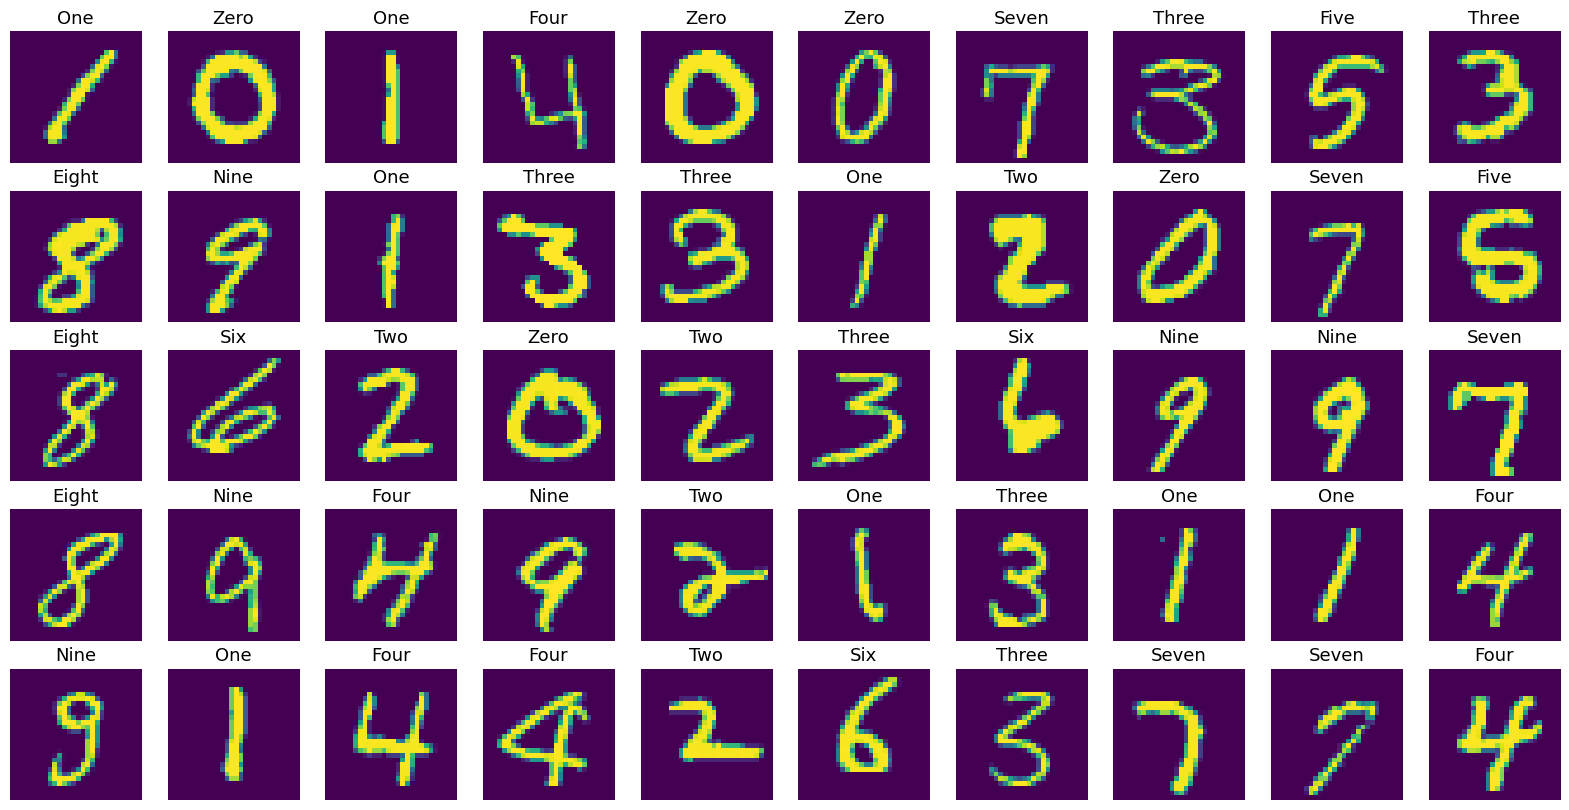

In [4]:
plt.figure(figsize=(20,10)) # specifying the overall grid size
#plt.subplots_adjust(hspace=0.4)

train_labels = train['label'].values
train_images = train.drop('label', axis=1).values.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
test_images = test.values.reshape(-1, 28,28,1).astype(np.float32) / 255.0

labels = ['Zero','One','Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

for i in range(50):
    
    plt.subplot(5,10,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(train_images[i])
    plt.title(labels[int(train_labels[i])],fontsize=13)
   # plt.title(labels[i])
    plt.axis('off')

plt.show()

## 5 训练数据中的类分布

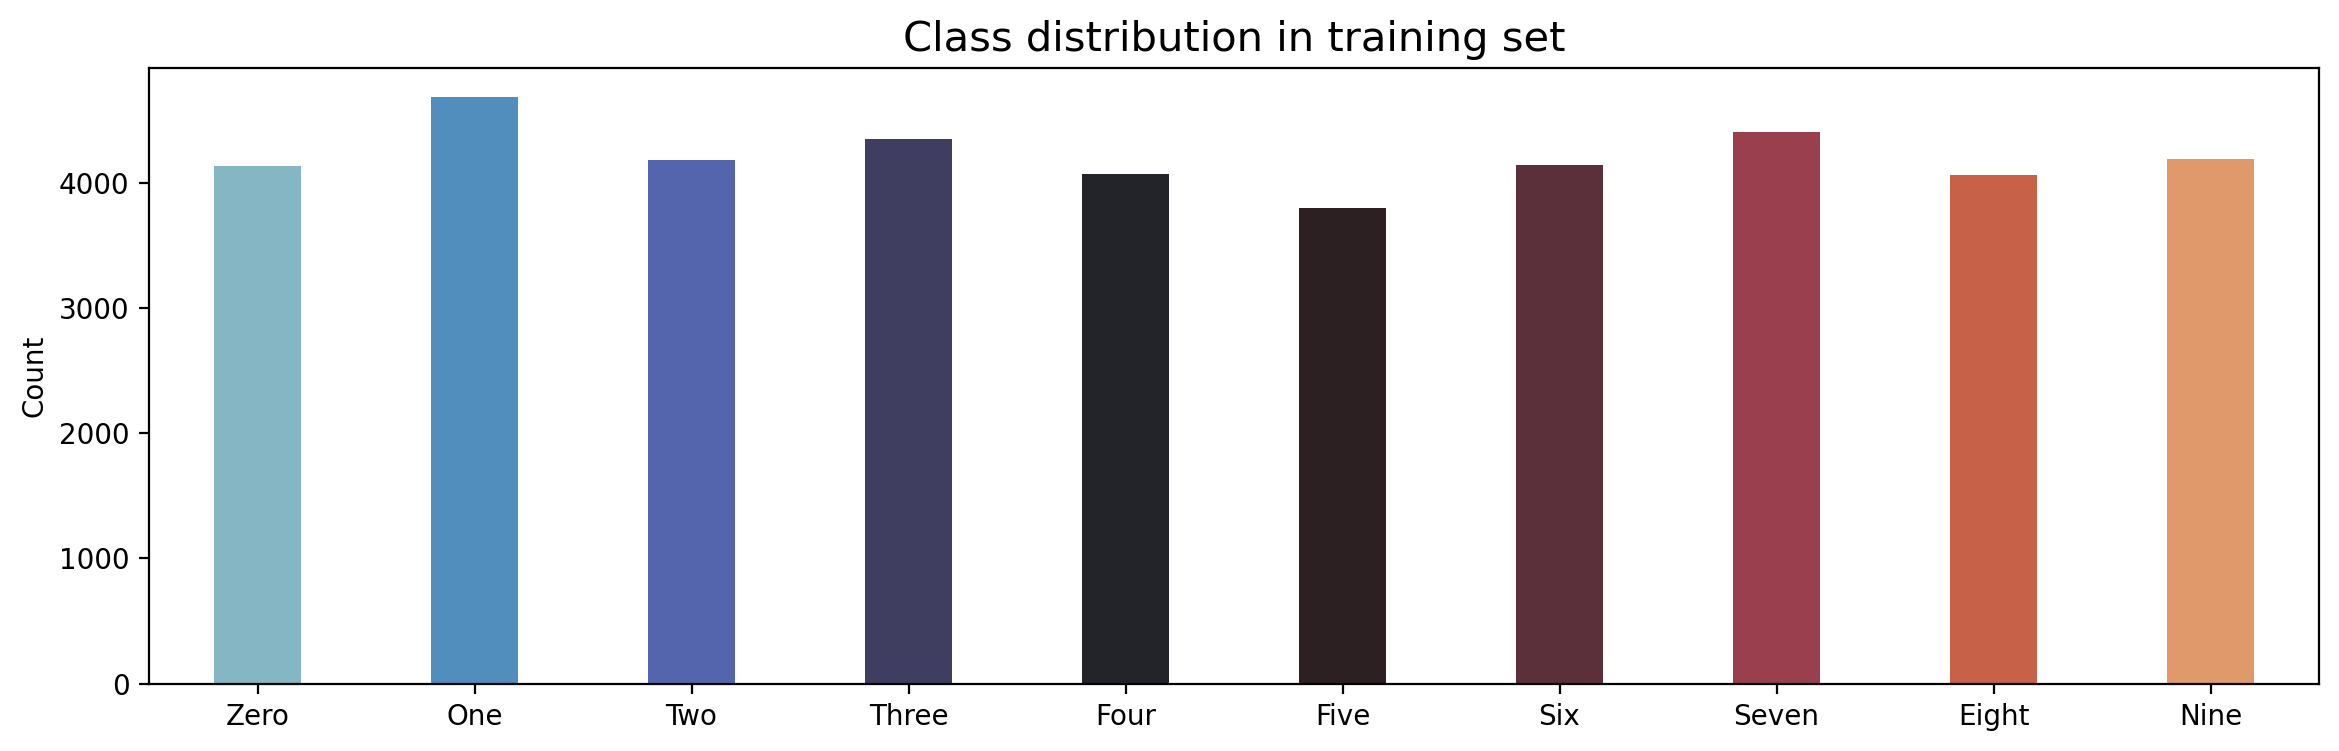

In [5]:
label,count = np.unique(train_labels,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in training set',fontsize=15)
plt.show()

## 6 训练数据和测试数据

In [6]:
X = train.drop(columns='label')
y = train['label']

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

y_true = y_test
print("train.head=",train.head())

train.head=    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0       

## 7 创建每个数据集中类分布的可视化

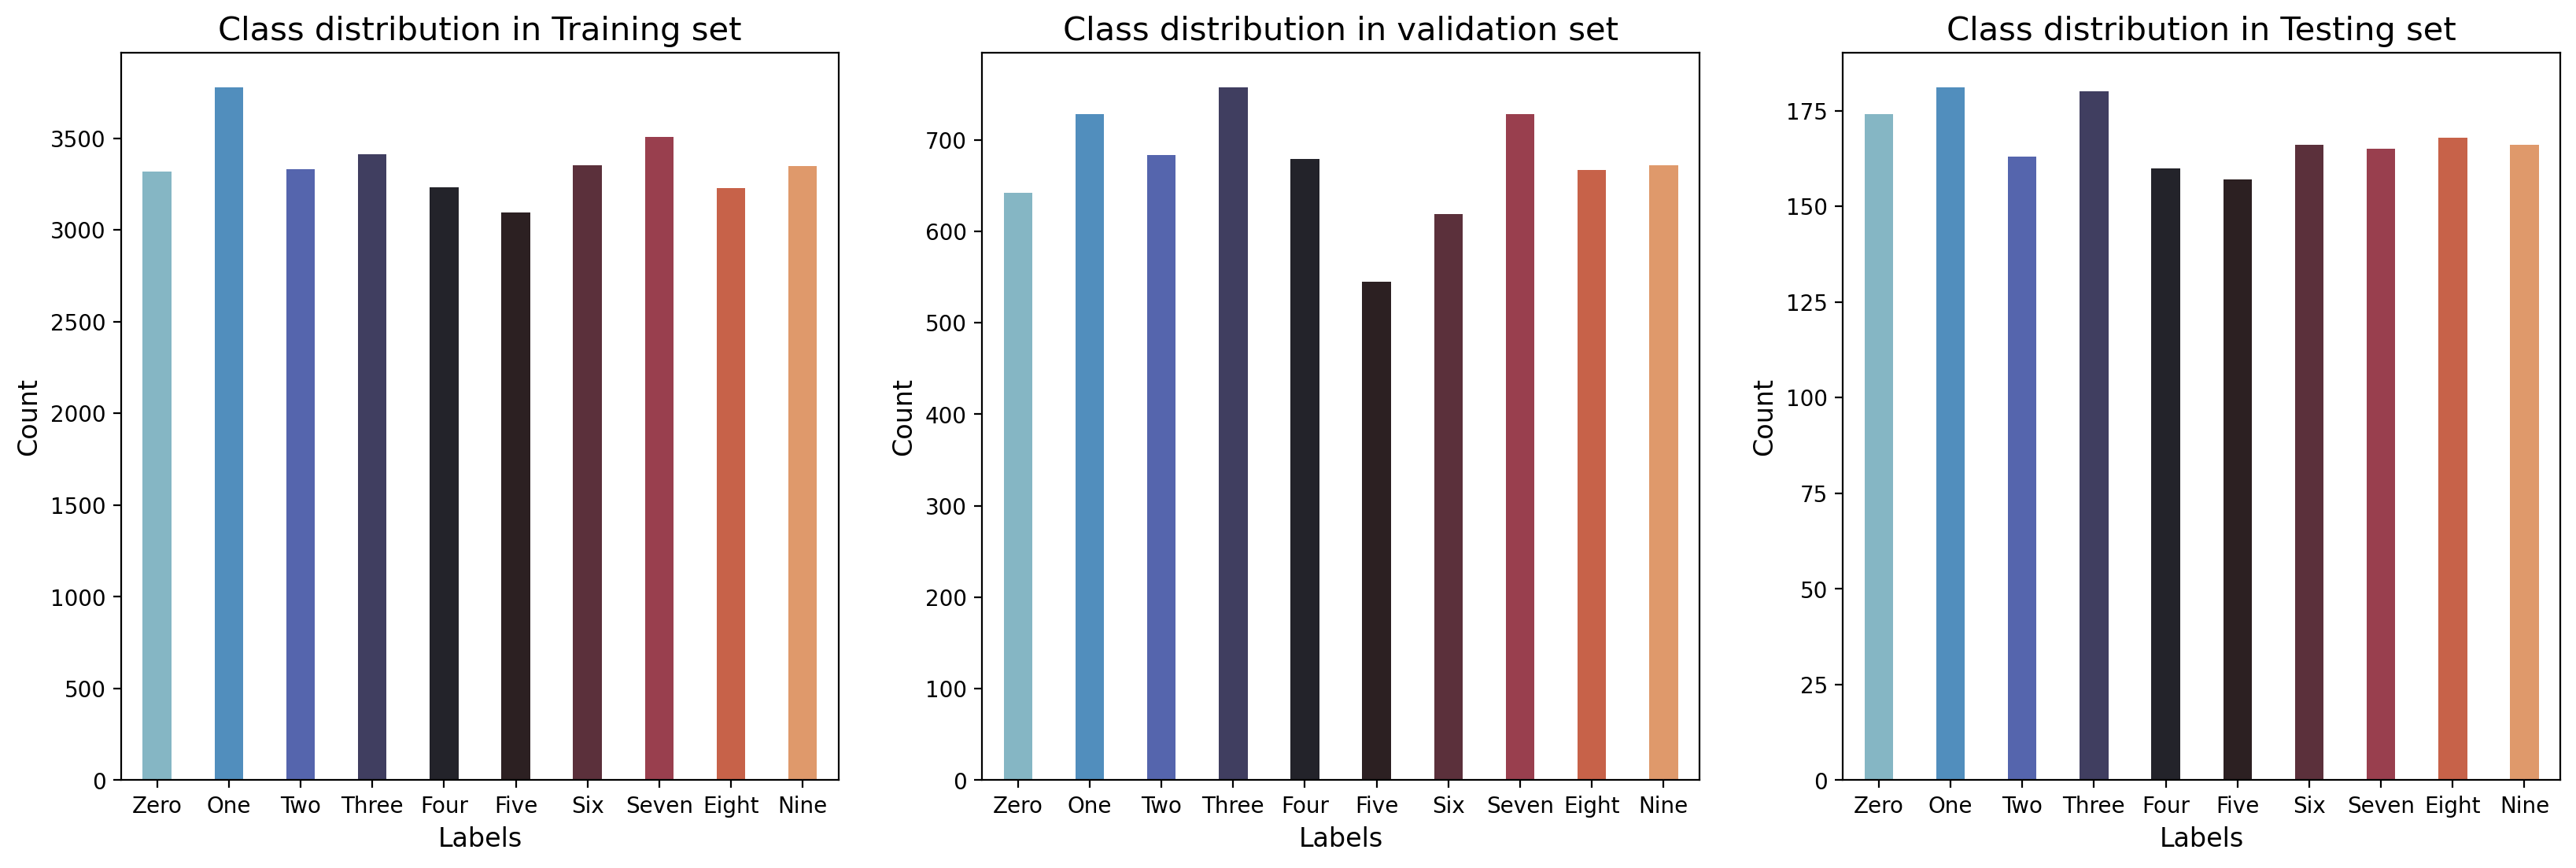

In [7]:
label1,count1 = np.unique(y_train,return_counts=True)
label2,count2 = np.unique(y_val,return_counts=True)
label3,count3 = np.unique(y_test,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
#sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.4).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.4).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.4).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

## 8 定义回调函数

In [8]:
# function to change the data type and normalize the data and reshape the data.
def reshape(data):
    return data.values.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0


# function to chnage the labels into categorical data
def to_cat(data):
    return to_categorical(data,num_classes=10)

## 9 处理前的数据类型

In [9]:
print('The shape of X_train and y_train before pre-processing:',X_train.shape,',',y_train.shape)

print('The shape of X_val and y_val before pre-processing:',X_val.shape,',',y_val.shape)

print('The shape of X_test and y_test before pre-processing:',X_test.shape,',',y_test.shape)

The shape of X_train and y_train before pre-processing: (33600, 784) , (33600,)
The shape of X_val and y_val before pre-processing: (6720, 784) , (6720,)
The shape of X_test and y_test before pre-processing: (1680, 784) , (1680,)


## 10 处理后的数据类型

In [10]:
X_train = reshape(X_train)
X_test = reshape(X_test)
X_val = reshape(X_val)
y_train = to_cat(y_train)
y_test = to_cat(y_test)
y_val = to_cat(y_val)
print('The shape of X_train and y_train after pre-processing:',X_train.shape,',',y_train.shape)

print('The shape of X_val and y_val after pre-processing:',X_val.shape,',',y_val.shape)

print('The shape of X_test and y_test after pre-processing:',X_test.shape,',',y_test.shape)

The shape of X_train and y_train after pre-processing: (33600, 28, 28, 1) , (33600, 10)
The shape of X_val and y_val after pre-processing: (6720, 28, 28, 1) , (6720, 10)
The shape of X_test and y_test after pre-processing: (1680, 28, 28, 1) , (1680, 10)


## 11 深度学习模型

In [11]:
model = Sequential()

model.add(Conv2D(32,3,activation='relu',padding='same',input_shape=(28,28,1)))
#model.add(BatchNormalization())
model.add(Conv2D(32,3, activation = 'relu', padding ='same'))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(2))


model.add(Conv2D(64,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(Conv2D(64,3, activation = 'relu', padding ='same'))
model.add(MaxPooling2D(2))
#model.add(Dropout(0.2))

model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

## 12 学习率衰减和快停止

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 5,restore_best_weights=True,verbose=0)

## 13 模型编译

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## 14 模型训练

In [14]:
digit = model.fit(X_train,y_train,
                  validation_data=(X_val,y_val),
                  callbacks=[learning_rate_reduction,early_stoping],
                  batch_size = 10,
                  epochs = 30,
                  verbose=1
                 )

Epoch 1/30
3360/3360 [==============================] - 109s 32ms/step - loss: 0.0286 - accuracy: 0.9512 - val_loss: 0.0200 - val_accuracy: 0.9732 - lr: 0.0010
Epoch 2/30
3360/3360 [==============================] - 106s 32ms/step - loss: 0.0107 - accuracy: 0.9846 - val_loss: 0.0105 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 3/30
3360/3360 [==============================] - 106s 31ms/step - loss: 0.0079 - accuracy: 0.9879 - val_loss: 0.0084 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 4/30
3360/3360 [==============================] - 105s 31ms/step - loss: 0.0071 - accuracy: 0.9893 - val_loss: 0.0081 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 5/30
3360/3360 [==============================] - 106s 31ms/step - loss: 0.0055 - accuracy: 0.9921 - val_loss: 0.0089 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 6/30
3360/3360 [==============================] - 105s 31ms/step - loss: 0.0049 - accuracy: 0.9933 - val_loss: 0.0082 - val_accuracy: 0.9897 - lr: 0.0010
Epoch 7/30
3360/3360 [==================

## 15 图像增强前的评估

In [15]:
# Evaluvate for train generator
loss,acc = model.evaluate(X_train,y_train,batch_size = 10, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(X_val,y_val,batch_size = 10, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.82143044471741
The Loss of the model for training data is: 0.0013858884340152144
The accuracy of the model for validation data is: 99.21131134033203
The Loss of the model for validation data is: 0.0063929688185453415


## 16 图像增强之前的绘制结果

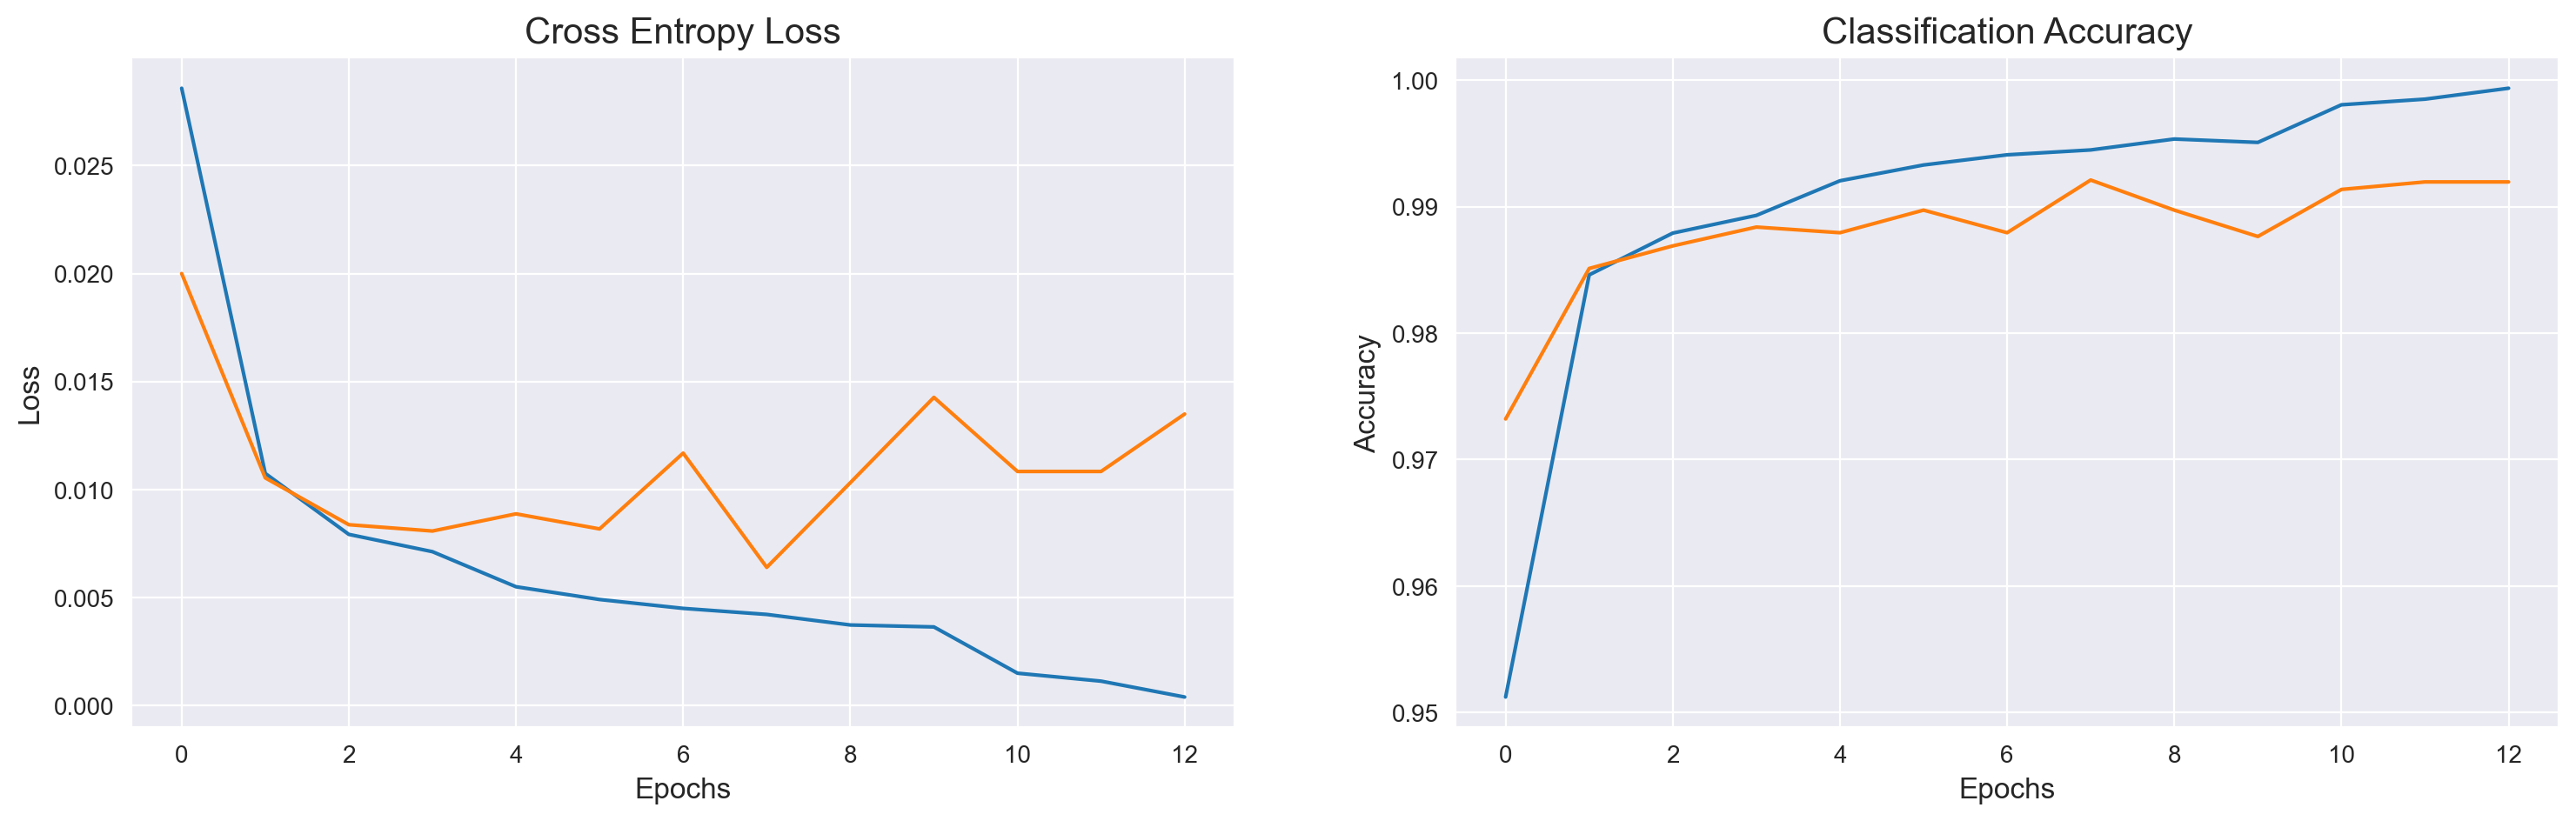

In [16]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(digit.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

## 17 数据增强

In [17]:
# Creating image data generator
train_datagen = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,
                                   #featurewise_center=True,
                                   #featurewise_std_normalization=True,
                                   #zca_whitening=True
                                  )

train_datagen.fit(X_train)

train_gen = train_datagen.flow(X_train,y_train,batch_size=10)

In [18]:
# fiting the model again
digit = model.fit(train_gen,
                  validation_data=(X_val,y_val),
                  callbacks=[learning_rate_reduction,early_stoping],
                  batch_size=10,
                  epochs=30,
                  verbose=1
                 )

Epoch 1/30
3360/3360 [==============================] - 107s 32ms/step - loss: 0.0334 - accuracy: 0.9474 - val_loss: 0.0049 - val_accuracy: 0.9935 - lr: 2.5000e-04
Epoch 2/30
3360/3360 [==============================] - 106s 32ms/step - loss: 0.0128 - accuracy: 0.9817 - val_loss: 0.0046 - val_accuracy: 0.9939 - lr: 2.5000e-04
Epoch 3/30
3360/3360 [==============================] - 108s 32ms/step - loss: 0.0098 - accuracy: 0.9856 - val_loss: 0.0056 - val_accuracy: 0.9936 - lr: 2.5000e-04
Epoch 4/30
3360/3360 [==============================] - 109s 32ms/step - loss: 0.0083 - accuracy: 0.9875 - val_loss: 0.0042 - val_accuracy: 0.9943 - lr: 2.5000e-04
Epoch 5/30
3360/3360 [==============================] - 107s 32ms/step - loss: 0.0075 - accuracy: 0.9893 - val_loss: 0.0041 - val_accuracy: 0.9948 - lr: 2.5000e-04
Epoch 6/30
3360/3360 [==============================] - 109s 32ms/step - loss: 0.0070 - accuracy: 0.9898 - val_loss: 0.0057 - val_accuracy: 0.9930 - lr: 2.5000e-04
Epoch 7/30
3360/

## 18 图像增强之后的评估

In [19]:
# Evaluvate for train generator
loss,acc = model.evaluate(X_train,y_train,batch_size = 10, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(X_val,y_val,batch_size = 10, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.83035922050476
The Loss of the model for training data is: 0.0012408402981236577
The accuracy of the model for validation data is: 99.40476417541504
The Loss of the model for validation data is: 0.0039262669160962105


## 19 绘制图像增强后的结果

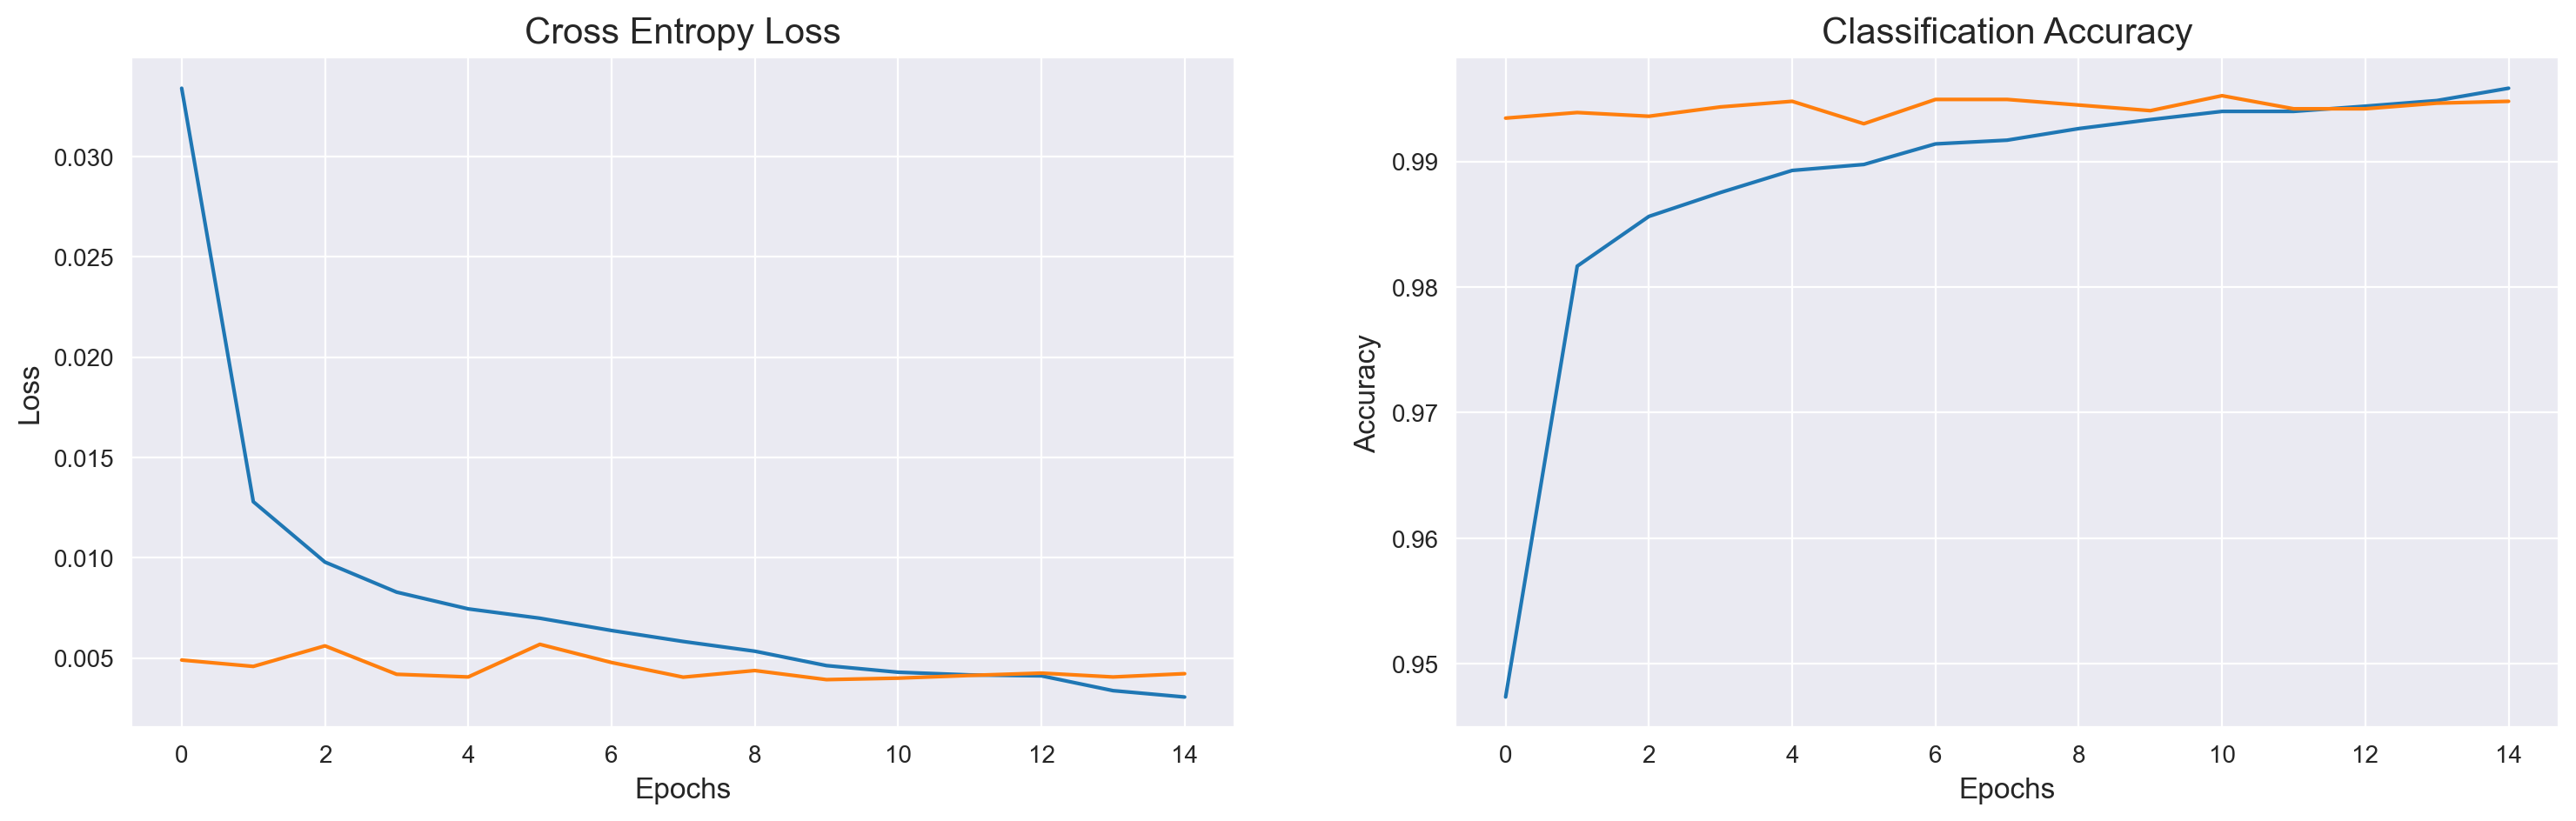

In [20]:
error = pd.DataFrame(digit.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

## 20 预测

In [21]:
# prediction
result = model.predict(X_test, batch_size = 10,verbose = 0)

y_pred = np.argmax(result, axis = 1)

## 21 评估

In [22]:
# Evaluvate
loss,acc = model.evaluate(X_test,y_test, batch_size = 10, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 99.22618865966797
The Loss of the model for testing data is: 0.0054199835285544395


## 21 创建数据的分类报告

In [23]:
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

        Zero       0.99      0.99      0.99       174
         One       1.00      0.99      0.99       181
         Two       1.00      0.99      0.99       163
       Three       0.99      1.00      0.99       180
        Four       1.00      0.99      1.00       160
        Five       1.00      0.97      0.99       157
         Six       0.98      0.99      0.99       166
       Seven       0.99      0.99      0.99       165
       Eight       0.98      0.99      0.99       168
        Nine       0.99      1.00      0.99       166

    accuracy                           0.99      1680
   macro avg       0.99      0.99      0.99      1680
weighted avg       0.99      0.99      0.99      1680



## 22 绘制混淆矩阵

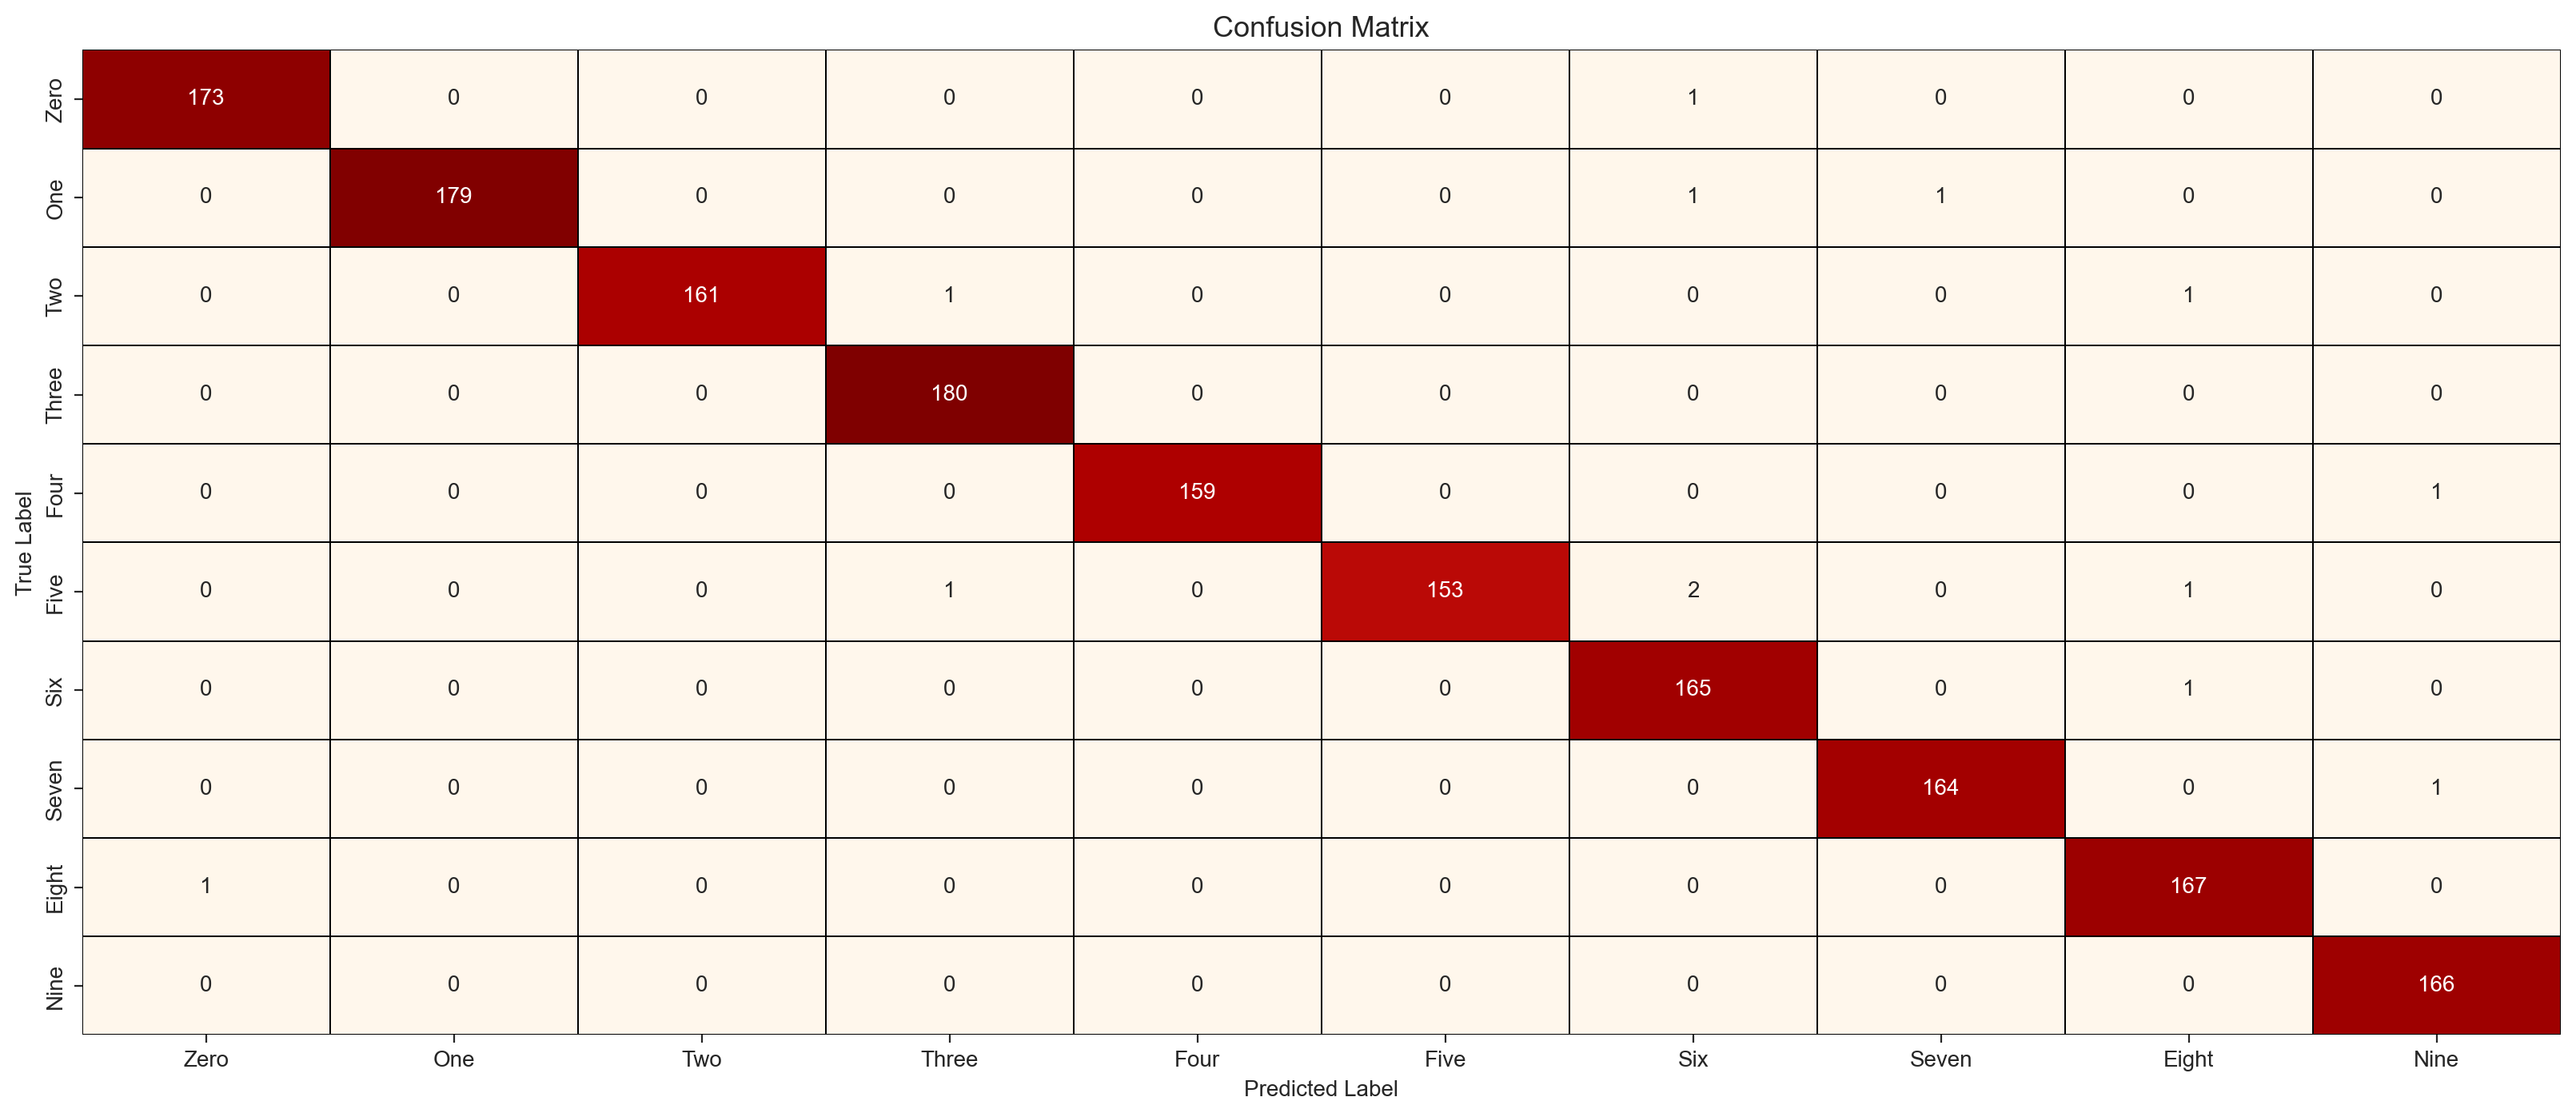

In [24]:
confusion_mtx = confusion_matrix(y_true,y_pred) 

sns.set_style('ticks')
f,ax = plt.subplots(figsize = (20,8),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "OrRd", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

## 23 预测数据

In [40]:
# first pre-process the test data
test_data = reshape(test)

# prediction
pred = model.predict(test_data, batch_size = 10,verbose = 0)

prediction = np.argmax(pred, axis = 1)
print(1+2)

3


In [38]:
submission = pd.read_csv(r'D:\WorkSpace\Kaggle\DigitRecognizer\data\InputData\sample_submission.csv')

submission['Label'] = prediction

submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [42]:
submission.to_csv(r'D:\WorkSpace\Kaggle\DigitRecognizer\data\OutputData\predict.csv')